## Fashion MNIST Classification problem
----

In [1]:
import matplotlib.pyplot as plt

### Importing Dataset 

In [2]:
from tensorflow.keras.datasets import fashion_mnist

### Spliting data into training and testing

In [3]:
(train_image , train_label) , (test_image , test_label) = fashion_mnist.load_data()

|Label | Description
|------|------------
|0	   | T-shirt/top
|1	|Trouser
|2	|Pullover
|3	|Dress
|4	|Coat
|5	|Sandal
|6	|Shirt
|7	|Sneaker
|8	|Bag
|9	|Ankle boot

In [4]:
train_image.shape , test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
train_label.size , test_label.size

(60000, 10000)

In [6]:
train_image[0].max()

255

In [7]:
train_image.max()

255

In [8]:
train_image.min()

0

### Preprocessing of data
#### 1-  Normalizing data

In [9]:
train_image = train_image / 255
test_image  = test_image  / 255

In [10]:
train_image.max()

1.0

In [11]:
test_image.min()

0.0

### Now for labels
#### to_categorical()

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
train_label , test_label

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [14]:
train_label = to_categorical(train_label)
test_label  = to_categorical(test_label) 

In [15]:
train_label , test_label

(array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

---------

In [16]:
# import numpy as np

In [17]:
# np.ravel(test_image).size

### Building ANN model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dense
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

In [20]:
model.add(Flatten(input_shape = (28,28) ))
model.add(Dense(120, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1210      
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [23]:
model.fit(train_image , train_label, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4945 - accuracy: 0.8239
Epoch 2/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3745 - accuracy: 0.8655
Epoch 3/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3373 - accuracy: 0.8755
Epoch 4/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3165 - accuracy: 0.8838
Epoch 5/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2968 - accuracy: 0.8901
Epoch 6/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2847 - accuracy: 0.8945
Epoch 7/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2702 - accuracy: 0.8996
Epoch 8/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2625 - accuracy: 0.9038
Epoch 9/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2501 - accuracy: 0.9075
Epoch 10/20
6

### Now check accuracy and loss on unseen data

In [24]:
test_loss , test_acc = model.evaluate(test_image,test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [25]:
print(f'Loss on unseen data is: {test_loss}')
print(f'Accuracy on unseen data is: {test_acc}')

Loss on unseen data is: 0.3551384315609932
Accuracy on unseen data is: 0.8885999917984009


### Now check prediction of model

In [26]:
pred_1 = model.predict([[test_image[5]]])
pred_1

array([[6.8401995e-08, 9.9999988e-01, 3.6292042e-10, 6.3073485e-10,
        2.7288652e-10, 9.4026073e-20, 1.0782356e-09, 1.7825004e-32,
        4.5224423e-15, 6.8166428e-18]], dtype=float32)

In [27]:
pred_1.max()

0.9999999

In [28]:
pred_1.argmax()

1

- **Model predict that image on index 5 of test data belong to class 1 which is Trouser**

### Now check whether model predict right or wrong

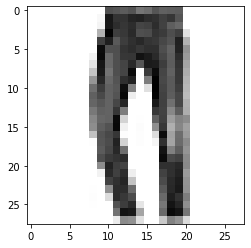

In [29]:
plt.imshow(test_image[5], cmap='Greys')
plt.show()                  

### So model predict right

------

In [30]:
pred_2 = model.predict([[test_image[1000]]])
pred_2

array([[2.9634938e-01, 3.4600209e-10, 1.7468825e-04, 2.7041000e-04,
        1.3062867e-05, 2.0454651e-09, 7.0309162e-01, 3.2235328e-17,
        1.0086104e-04, 3.5937114e-13]], dtype=float32)

In [31]:
pred_2.argmax()

6

- **Model predict that the image on index 1000 from test data belong to class 6 which is Shirt**

### Now check whether model predict right or wrong

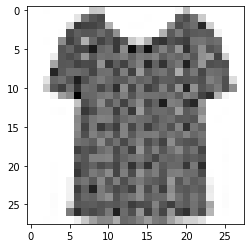

In [32]:
plt.imshow(test_image[1000], cmap='Greys')
plt.show()

In [33]:
test_label[1000]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)